# Homework 1 (100 points)

This homework focuses on the pandas library and clustering. There are no python library restrictions for this homework. Suggested libraries are pandas, numpy, regex, and sklearn.

## Submission Instructions
**When completing your homework and preparing for the final submission on GitHub, it's important to ensure that you not only push the final .ipynb file but also create a PDF version of the notebook and include it in the repository. This PDF version serves as an essential backup and ensures that your work is easily accessible for grading. Once both the .ipynb and .pdf files are in the GitHub repository, be sure to add a link to the GitHub repository in Gradescope for assessment. `Please note that failing to submit the .pdf file as part of your assignment may result in point deductions, so it's crucial to follow these steps diligently to ensure a complete and successful submission.`**

## Exercise 1 (40 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines (except for `e` and `m`)

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

#### a) Write a function that reads in a filepath to a csv and returns the DataFrame. (1 point)

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### b) Write a function that returns the number of rows that have at least one empty column value - (2 points)

In [6]:
def num_nans(df):
    return df[pd.isna(df).any(axis = 1)].shape[0]

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


#### c) Write a function that removes all columns with more than 200 NaN values - (2 points)

In [7]:
def drop_na(df):
    return df.dropna(axis=1, thresh=df.shape[0]-200)

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### d) Write a function that replaces `male` with 0 and `female` with 1 - (2 points)

In [9]:
def to_numerical(df):
    return df['Sex'].replace({'male': 0, 'female': 1})

df.loc[:, 'Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


#### e)  Transforming Names (9 points)

The dataset contains a column called `Name` which consists of names in the following format: "Last Name, Title. First Name Middle Name" (e.g., "Braund, Mr. Owen Harris"). In this question, you will write a Python function to extract and separate various components of the `Name` into four new columns: `First Name`, `Middle Name`, `Last Name`, and `Title`.

Write a Python function named `extract_names(df)` to accomplish this task. The function should take `df` as input and should return the four new columns.

For example, if the original `Name` column contains "Braund, Mr. Owen Harris", the resulting four columns should look like this:

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [10]:
def extract_names(df):
    name_pattern = (r'(?P<Last_Name>[a-zA-Z]+), (?P<Title>\w+)\. (?P<First_Name>\w+)'
                    r'(?: (?P<Middle_Name>\w+))?')
    names = df['Name'].str.extract(name_pattern)
    return names[['First_Name', 'Middle_Name', 'Last_Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


#### f) Write a function that replaces all missing ages with the average age - (2 points)

In [11]:
def replace_with_mean(df):
    return df['Age'].fillna(df['Age'].mean())

df['Age'] = replace_with_mean(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,NaN,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


`The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.`

#### g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (1 point)

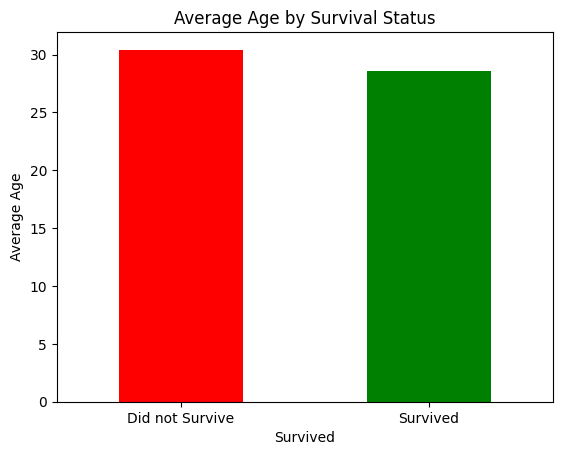

In [12]:
# your code here

import matplotlib.pyplot as plt

# Group by Survived and compute the mean age
avg_ages = df.groupby('Survived')['Age'].mean()

# Plotting
avg_ages.plot(kind='bar', color=['red', 'green'])
plt.title('Average Age by Survival Status')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['Did not Survive', 'Survived'], rotation=0)
plt.show()

-> your answer here:<br>
From the bar chart, we can observe the average age of those who survived and those who didn't. There's not a noticeable difference between the two bars. Thus, it might suggest that age did not play a role in survival chances.

#### h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (1 point)

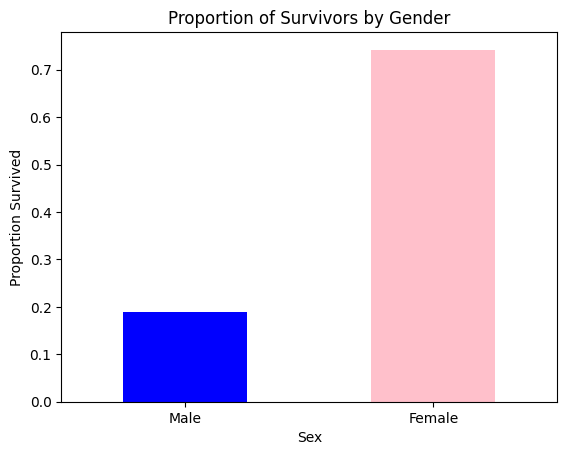

In [14]:
# your code here

# Group by Sex and compute the mean survival rate
survival_rate = df.groupby('Sex')['Survived'].mean()

# Plotting
survival_rate.plot(kind='bar', color=['blue', 'pink'])
plt.title('Proportion of Survivors by Gender')
plt.ylabel('Proportion Survived')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

-> your answer here:<br>
There is a significant difference between the two bars, which suggests that gender played a role in the survival chances on the Titanic.

#### i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (2 points)

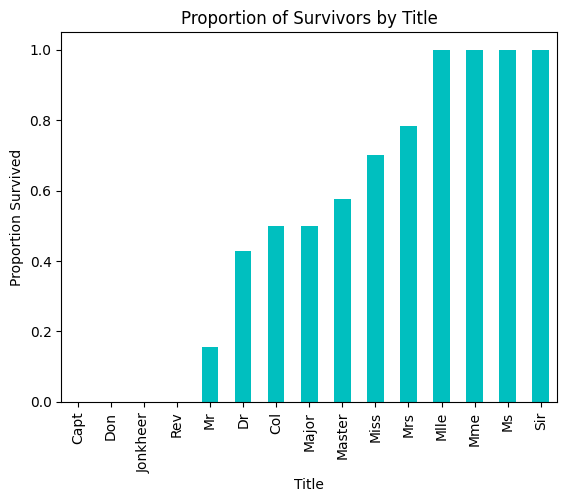

In [15]:
# your code here

# Group by Title and compute the mean survival rate
title_survival_rate = df.groupby('Title')['Survived'].mean()

# Plotting
title_survival_rate.sort_values().plot(kind='bar', color='c')
plt.title('Proportion of Survivors by Title')
plt.ylabel('Proportion Survived')
plt.xlabel('Title')
plt.show()

-> your answer here:<br>
Some titles have significantly higher survival rates compared to others. For instance, titles associated with females (like "Miss" or "Mrs") show higher survival rates than those associated with males. Also, titles associated with workers on the boats like "Capt" and "Don" have lower survival rates. 

#### j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

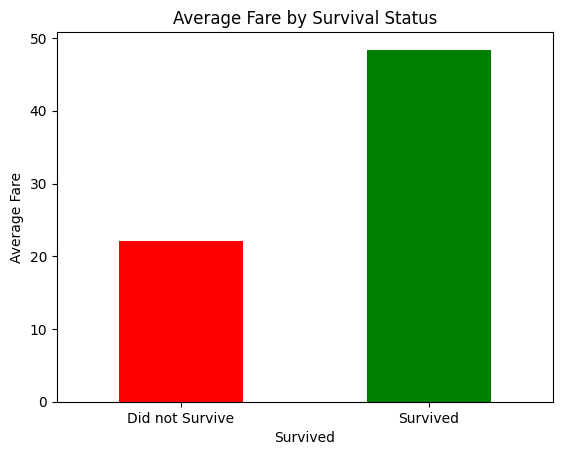

In [16]:
# your code here

# Group by Survived and compute the mean fare
avg_fares = df.groupby('Survived')['Fare'].mean()

# Plotting
avg_fares.plot(kind='bar', color=['red', 'green'])
plt.title('Average Fare by Survival Status')
plt.ylabel('Average Fare')
plt.xticks([0, 1], ['Did not Survive', 'Survived'], rotation=0)
plt.show()

-> your answer here:<br>
There's a significant difference between the two bars, which suggests that fare (which can be a proxy for passenger class) played a role in the survival chances on the Titanic.

#### k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (2 points)

<Figure size 800x600 with 0 Axes>

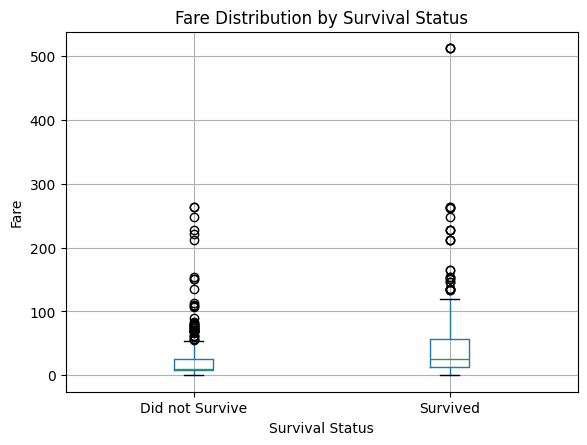

In [17]:
# your code here

# Boxplot for Fare based on Survival Status
plt.figure(figsize=(8, 6))
df.boxplot(column='Fare', by='Survived')
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # This line removes the automatic 'Boxplot grouped by...' title
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.xticks([1, 2], ['Did not Survive', 'Survived'])
plt.show()

-> your answer here:<br>
The median fare for survivors was higher than for non-survivors, which reaffirms the idea that passengers who paid more (likely higher class passengers) had better survival rates.

#### l) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2 points)

In [18]:
# your code here

def standardize_fare(df):
    mean_fare = df['Fare'].mean()
    std_fare = df['Fare'].std()
    
    return (df['Fare'] - mean_fare) / std_fare

# Using the function
df['Standardized_Fare'] = standardize_fare(df)

df['Standardized_Fare'].head()

0   -0.502163
1    0.786404
2   -0.488580
3    0.420494
4   -0.486064
Name: Standardized_Fare, dtype: float64

#### m) Remove all non-numerical columns from the dataframe. - (2 points)

In [19]:
df = df.select_dtypes(include=['number'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Standardized_Fare
0,1,0,3,0,22.0,1,0,7.2500,-0.502163
1,2,1,1,1,38.0,1,0,71.2833,0.786404
2,3,1,3,1,26.0,0,0,7.9250,-0.488580
3,4,1,1,1,35.0,1,0,53.1000,0.420494
4,5,0,3,0,35.0,0,0,8.0500,-0.486064


#### n) Your task is to write a Python function, `N_most_similar_pairs(df, N)` (10pts)


Please use the dataset created from applying all the above transformations / modifications. This function calculates and returns the names of the N most similar pairs of passengers based on Euclidean distance. Additionally, you should ignore pairs that have a distance of zero.
Here's a step-by-step breakdown of the task:
1. Remove all non-numerical columns from the dataset (including Passenger ID), as we're only interested in numerical attributes for calculating similarity.
2. Calculate the Euclidean distance between each pair of passengers based on their numerical attributes. You can use python's any built-in function for this step.
3. Ignore pairs of passengers that have a distance of zero (meaning they are identical).
4. Find the N most similar pairs of passengers based on their Euclidean distances. These pairs should have the smallest distances.

In [21]:
import numpy as np

def euclidean_distance(row1, row2):
    """Calculate the Euclidean distance between two rows."""
    return np.sqrt(np.sum((row1 - row2) ** 2))

def N_most_similar_pairs(df, N):
    # Drop the 'PassengerId' column
    df = df.drop(columns=['PassengerId'], errors='ignore')
    
    # Initialize an empty list to store distances and passenger pairs
    distances = []
    
    for i in range(len(df)):
        for j in range(i+1, len(df)):  # To avoid duplicate pairs and diagonal
            dist = euclidean_distance(df.iloc[i].values, df.iloc[j].values)
            if dist > 0:  # Ensure non-zero distance
                distances.append(((df.index[i], df.index[j]), dist))
                
    # Sort by distance and get the first N pairs
    distances.sort(key=lambda x: x[1])
    
    return [pair[0] for pair in distances[:N]]

print("The 3 most similar pairs of passengers are: " + str(N_most_similar_pairs(df, 3)))

The 3 most similar pairs of passengers are: [(240, 578), (388, 629), (19, 367)]


## Exercise 2 (40 points)

This exercise will use the `fetch_olivetti_faces` dataset and challenge your understanding of clustering and K-means.

#### a) Using K-means, cluster the facial images into 10 clusters and plot the centroid of each cluster. 

Hint: The centroid of each cluster has the same dimensions as the facial images in the dataset. - (10 points)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\yuhan\scikit_learn_data


c:\Users\yuhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


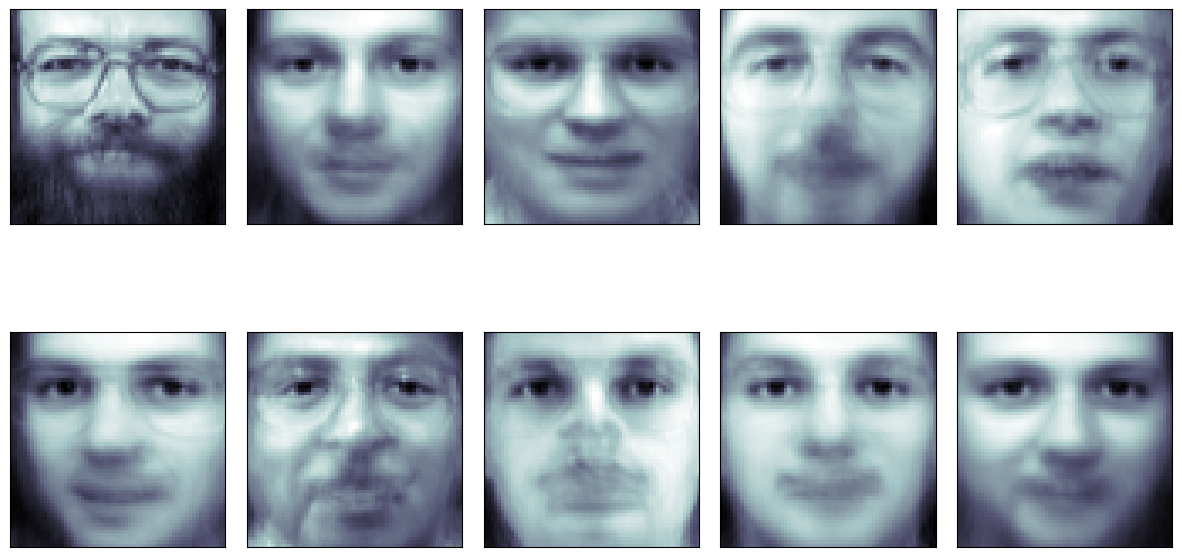

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
faces_data = faces.data

# your code here

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(faces_data)

# Plot the centroids
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(64, 64), cmap='bone')

plt.show()

#### b) Silhouette Scores
Now, let's compare the quality of the clustering obtained through K-means in part `a` with a different clustering generated from the labels attached to each image. Each image in the dataset is associated with a label corresponding to the person's identity. As a result, these labels can naturally generate a clustering where all images of the same person belong to the same cluster (e.g., all images of person A are in cluster A).

Your task is to calculate the silhouette score for the clustering obtained through K-means in part `a` and the clustering generated from the labels attached to each image.
Explain the results and differences in silhouette scores between the two clustering approaches.  - (10 points)

In [24]:
from sklearn.metrics import silhouette_score

# Clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(faces_data)

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(faces_data, kmeans_clusters)
labels_silhouette = silhouette_score(faces_data, faces.target)

print(f"Silhouette Score for KMeans Clustering: {kmeans_silhouette:.3f}")
print(f"Silhouette Score for Labels Clustering: {labels_silhouette:.3f}")


c:\Users\yuhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for KMeans Clustering: 0.092
Silhouette Score for Labels Clustering: 0.106


-> Your answer here:<br>
KMeans is close to 0, which suggests that the clusters generated by KMeans may have some overlap, indicating that the facial images within each cluster are not very distinct from those in the neighboring clusters.<br>
Labels is slightly higher than that of KMeans clustering, indicating that using the natural labels (based on individual identity) to form clusters might have slightly better-defined clusters than the KMeans clustering. However, it's worth noting that this score is also close to 0, suggesting there's still a level of overlap between the clusters based on individual identities.

#### c) Plot a random image from the `fetch_olivetti_faces` dataset. - (5 points)

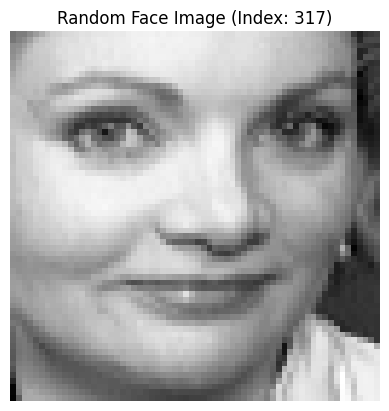

In [25]:
# Load the dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)

# Select a random image
random_idx = np.random.randint(0, len(faces.images))
random_face = faces.images[random_idx]

# Plot the image
plt.imshow(random_face, cmap='gray')
plt.axis('off')  # Hide axes
plt.title(f"Random Face Image (Index: {random_idx})")
plt.show()

#### d) By applying K-Means clustering to this dataset, we are clustering for similar facial patterns and features. The centroid of each cluster will represent a facial pattern. You can then replace every pixel in the original image with the centroid of the cluster it was assigned to, thus only using K facial patterns to recreate the image. Using the same image as in c), produce an image that only uses 3 facial patterns (the 3 centroids of the clusters obtained by clustering the image itself using K-Means). - (10 points)

For example, if the left side is your original image, the transfomed image with 3 centroids should look like the right side

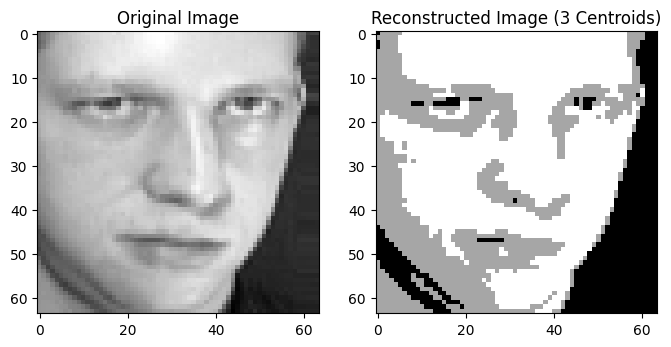

In [26]:
from IPython.display import Image
Image(filename="Example.png", width=600, height=600)

c:\Users\yuhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


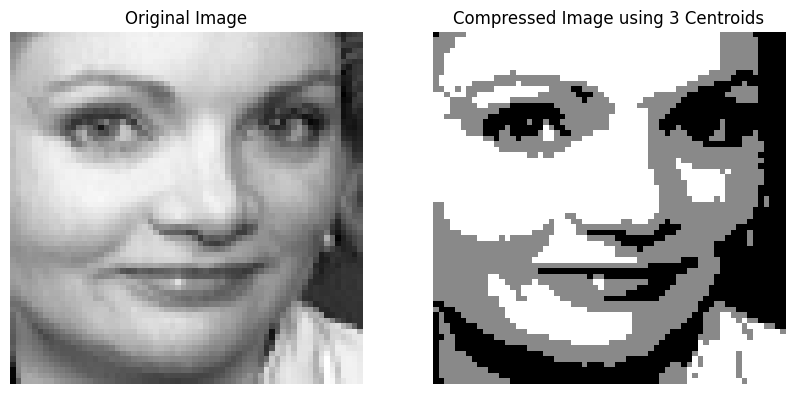

In [27]:
# Flatten the image to make it a 2D array
X = random_face.reshape(-1, 1)  # As this is a grayscale image, it has only one channel.

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Map each pixel to the centroid of its cluster
X_compressed = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])

# Reshape to original image shape
compressed_face = X_compressed.reshape(random_face.shape)

# Plot the original and the compressed images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(random_face, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(compressed_face, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Compressed Image using 3 Centroids')

plt.show()

#### e) From the code above, write a function that can handle any number of chosen colors. Demonstrate it working on the same picture using 2 colors and 10 colors. - (5pts)

c:\Users\yuhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\yuhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


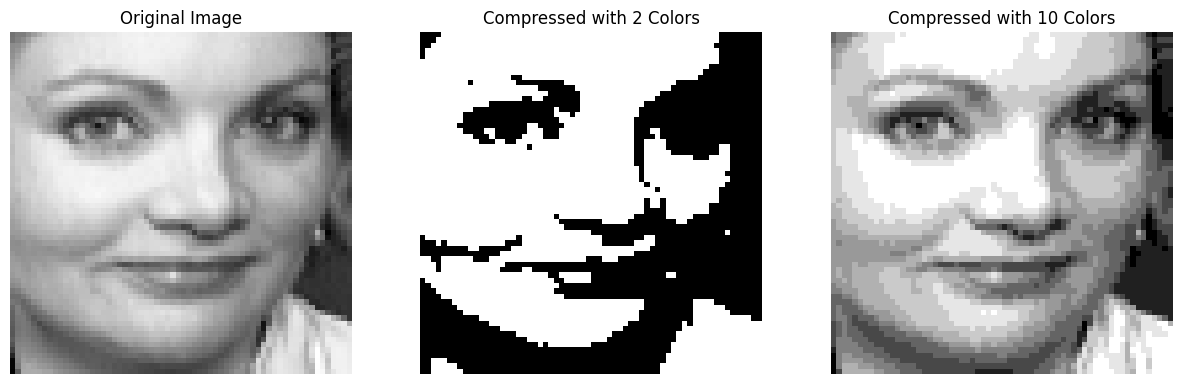

In [28]:
def compress_image_colors(image, n_colors):
    """
    Compress an image using KMeans clustering to represent it using n_colors.
    Args:
    - image: A 2D numpy array representing the grayscale image.
    - n_colors: The number of colors (or centroids) to use for the compression.
    
    Returns:
    - Compressed image as a 2D numpy array.
    """
    # Flatten the image
    X = image.reshape(-1, 1)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(X)
    
    # Replace each pixel value with the corresponding centroid value
    X_compressed = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])
    
    # Reshape the compressed pixels to the original image shape
    return X_compressed.reshape(image.shape)

# Demonstrate the function
colors_to_try = [2, 10]
fig, ax = plt.subplots(1, len(colors_to_try) + 1, figsize=(15, 5))

# Original image
ax[0].imshow(random_face, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original Image')

# Compressed images
for i, n_colors in enumerate(colors_to_try, start=1):
    ax[i].imshow(compress_image_colors(random_face, n_colors), cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(f'Compressed with {n_colors} Colors')

plt.show()

## Exercise 3 (20pts)

Using the kmeans code from class:

1. Create a 3D dataset. The dataset should be generated randomly (you can pick the variance / covariance) around the following centers: `[[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]]` (5pts)
2. Modify the code from class to snapshot 3D images. (15pts) Make sure you:  
    a. use a `view_init` where the clusters and centers can easily be seen  
    b. set the appropriate `xlim`, `ylim` and `zlim` so that the plot doesn't change size

Please display your animation in the notebook (and pdf) in addition to adding it as a file to your repo.

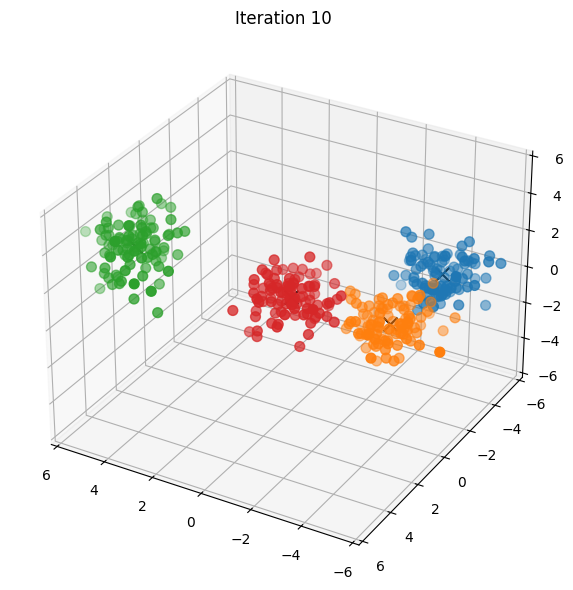

array([[-3.88061808, -4.08719939,  0.09169342],
       [-3.9422028 , -0.05588824,  0.12340889],
       [ 3.94428229,  3.98265881,  3.91812507],
       [ 0.04818945, -0.04318247,  0.02276514]])

In [30]:
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt

# Define centers and number of points to generate around each center
centers = np.array([[0, 0, 0], [4, 4, 4], [-4, -4, 0], [-4, 0, 0]])
n_points = 100
std_deviation = 0.8

# Generate points around each center
data = []
for center in centers:
    points = np.random.randn(n_points, 3) * std_deviation + center
    data.append(points)

# Combine all generated points into one dataset
data = np.vstack(data)

def kmeans_3D(data, n_clusters, n_iterations=10):
    # Randomly initialize cluster centers
    centers = data[np.random.choice(data.shape[0], size=n_clusters, replace=False)]
    
    for iteration in range(n_iterations):
        # Compute distances from each point to every center
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        
        # Assign points to the closest center
        labels = np.argmin(distances, axis=1)
        
        # Recompute centers
        new_centers = np.array([data[labels == i].mean(axis=0) for i in range(n_clusters)])
        
        # Visualize the data points and current centers
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        
        for i in range(n_clusters):
            ax.scatter(*data[labels == i].T, s=50)
            ax.scatter(*new_centers[i], color='black', marker='x', s=100)

        ax.set_xlim([-6, 6])
        ax.set_ylim([-6, 6])
        ax.set_zlim([-6, 6])
        ax.view_init(elev=30, azim=120)  # Set a view angle that shows clusters well
        
        plt.title(f"Iteration {iteration + 1}")
        plt.tight_layout()
        plt.draw()
        
        clear_output(wait=True)
        plt.pause(0.5)
        
        # Update centers
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    plt.show()
    return centers

# Running the K-means algorithm
kmeans_3D(data, n_clusters=4)